# Project Description

The gym chain XY is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. My task is to analyze them and come up with a customer retention strategy.

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


For 'gender' feature: 1=male and 0=female. For 'churn' feature; 1=churn(they left), 0=didn't churn(they stayed).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


There are 4000 entries with no missing data. All the data is numerical; integer or real dtype.

In [5]:
data.columns = data.columns.str.lower()
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


I put the name of columns in lowercase.

In [6]:
data.describe(include='all')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Mean feature values; for those who left (churn) and for those who stayed. To recall; 1=churn(they left), 0=didn't churn(they stayed).

Clients that churn; the mean value of the contract_period is lower, they participate less in the group activity, month_to_end_contract is lower than at those who didn't churn.

In [8]:
churn_data = data.query('churn==1')
len(churn_data)

1061

There are 1061 out of 4000 clients that churned in the previous month.

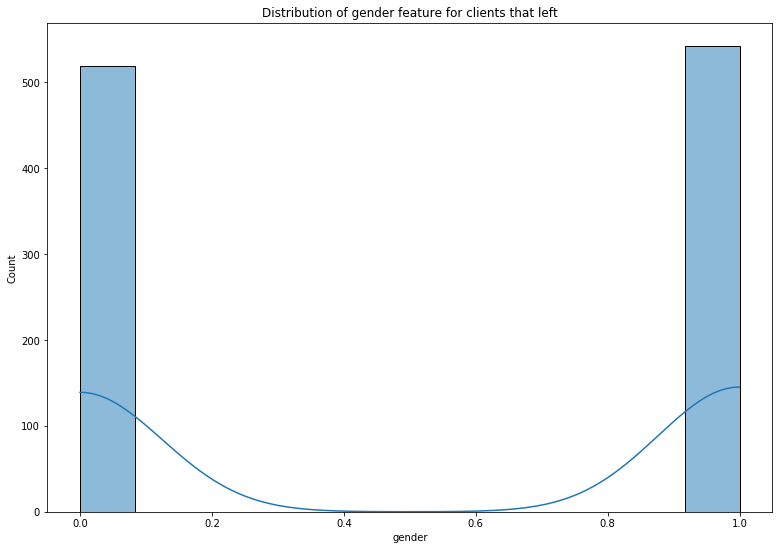

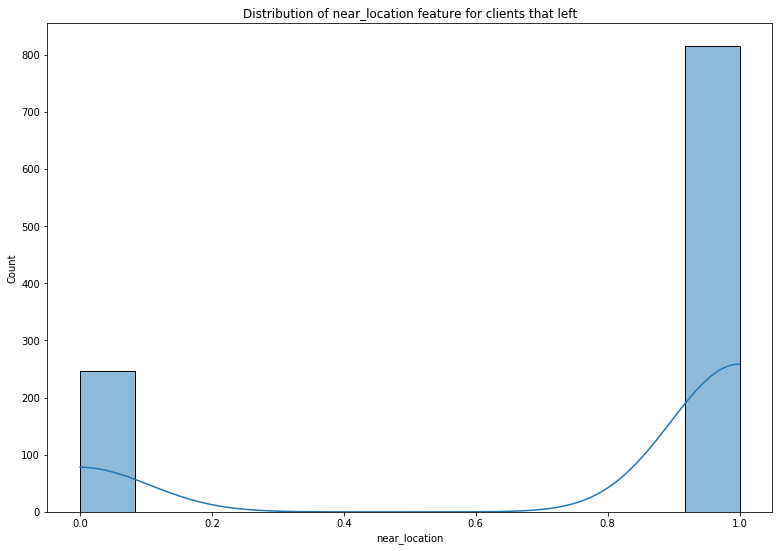

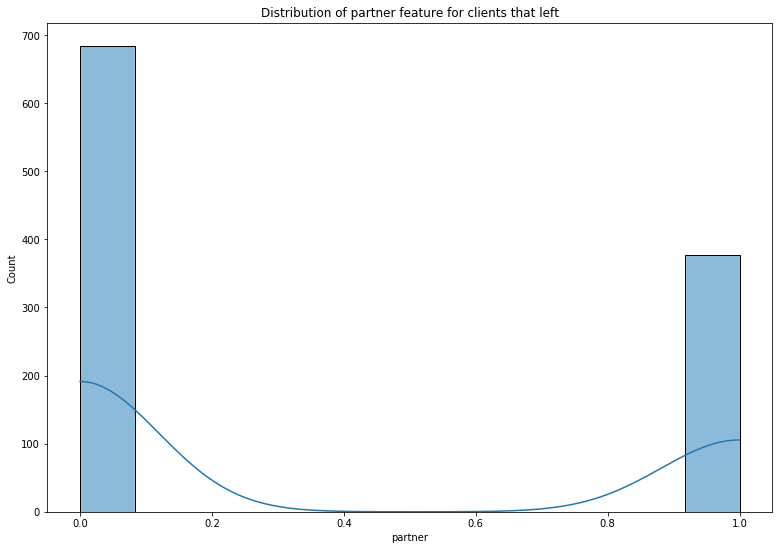

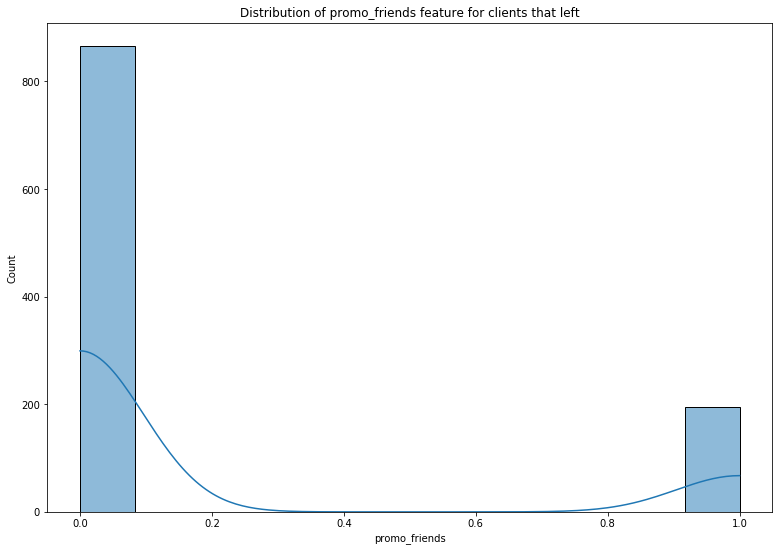

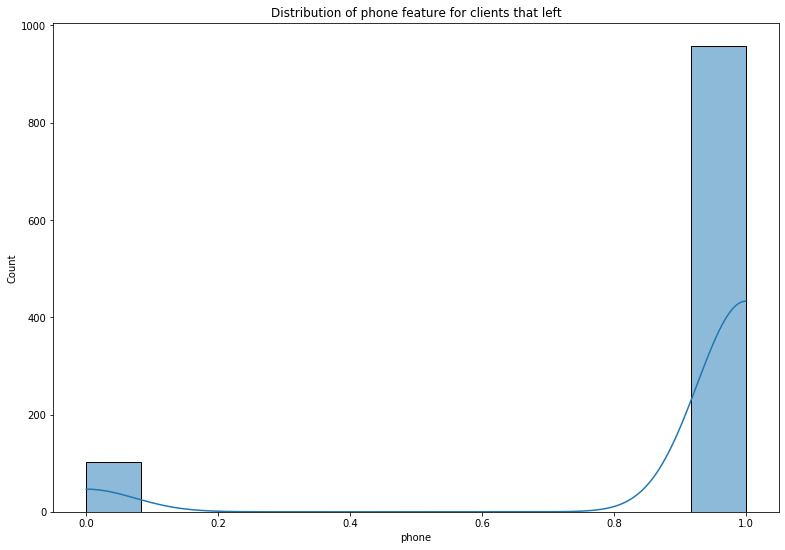

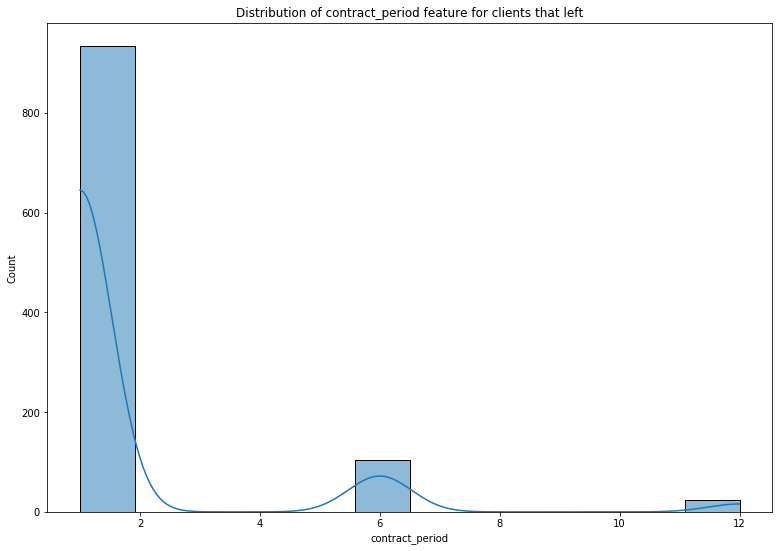

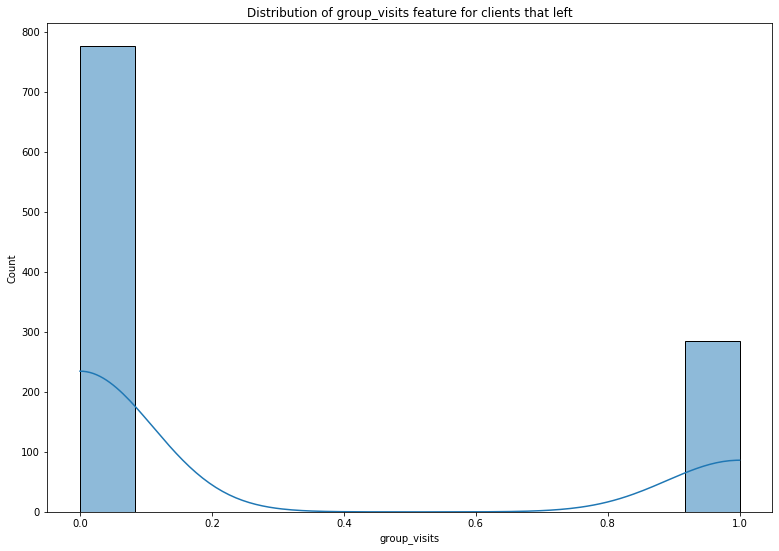

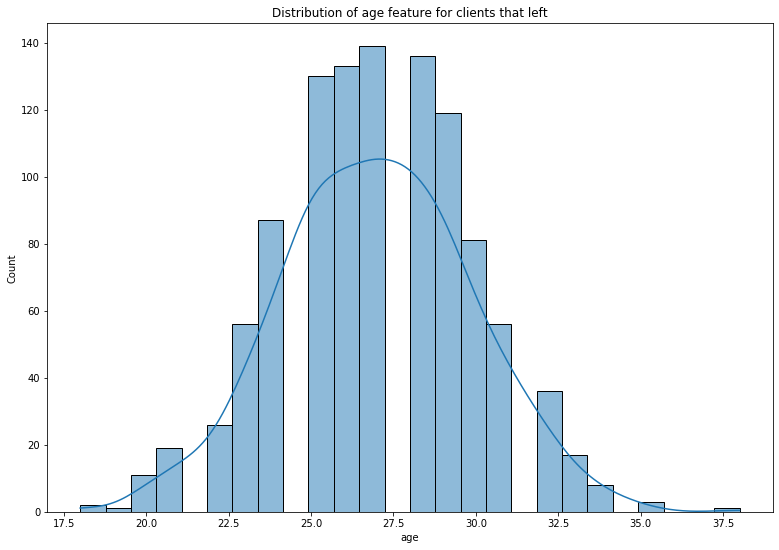

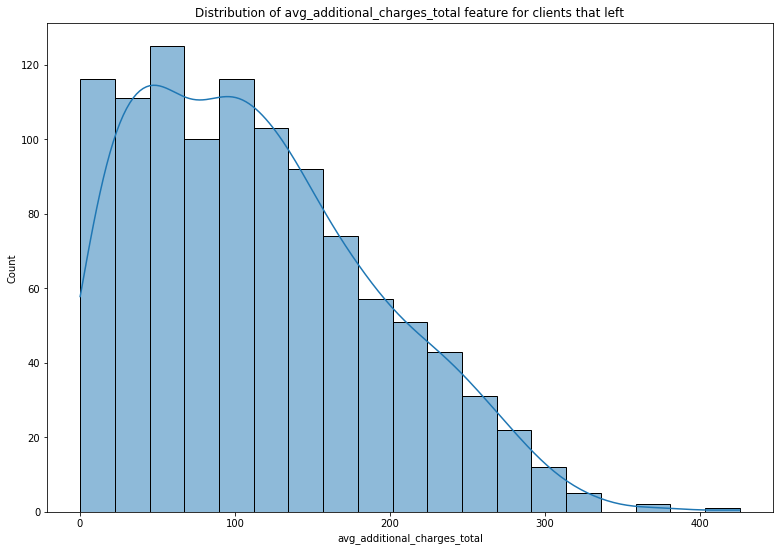

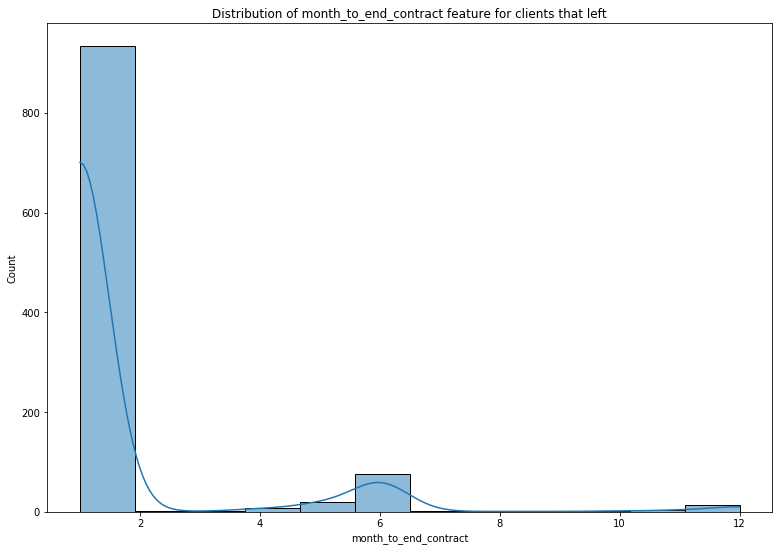

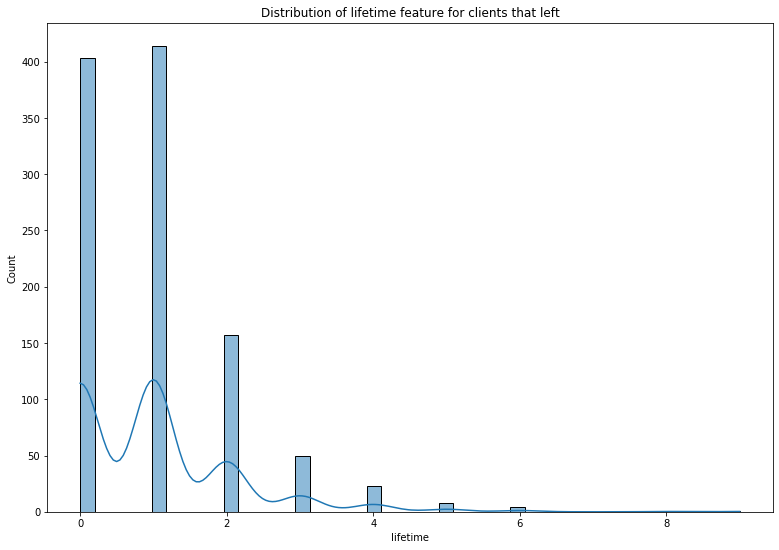

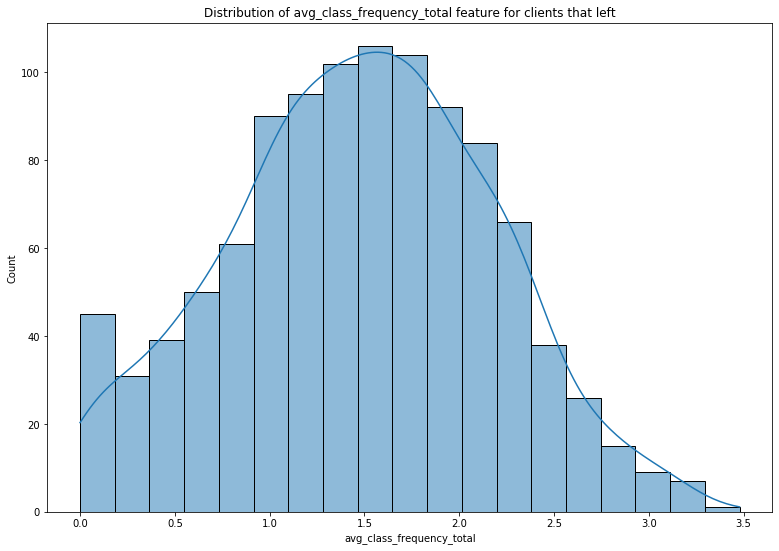

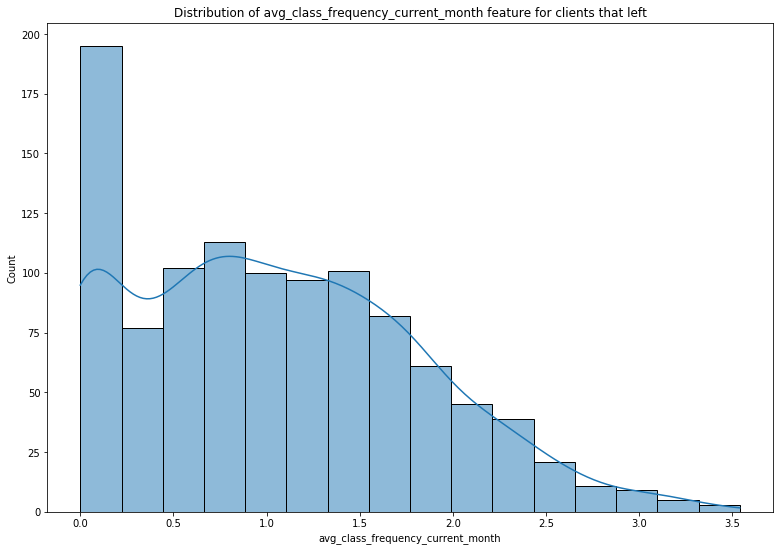

In [32]:
for i in churn_data.columns:
    if i == 'churn':
        continue
    else: 
        plt.figure(figsize=(13,9))
        sns.histplot(churn_data[i],kde=True)
        plt.title('Distribution of {} feature for clients that left'.format(i))
        plt.show()

Distribution of features in data where clients churn:
Gender distribution is 50:50. Most of the clients live near the gym. More of them are not employees of a partner company. Big share of them did not use the promo ticket. Most of them left their phone number. Most of them are on the 1 month contract. Most of them did not participate in the group visits. Age distribution looks almost normal, with mean around 27. Usually the had 1 month until ending of a contract. Most of them are not more than 2 months gym member.

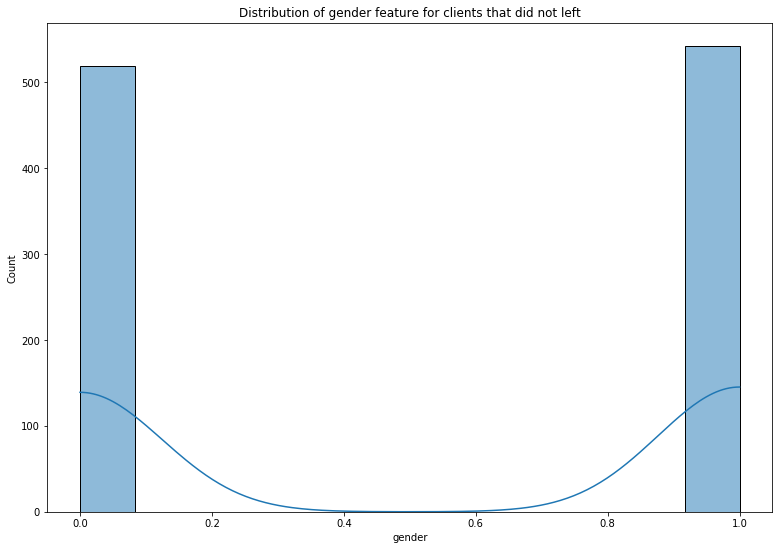

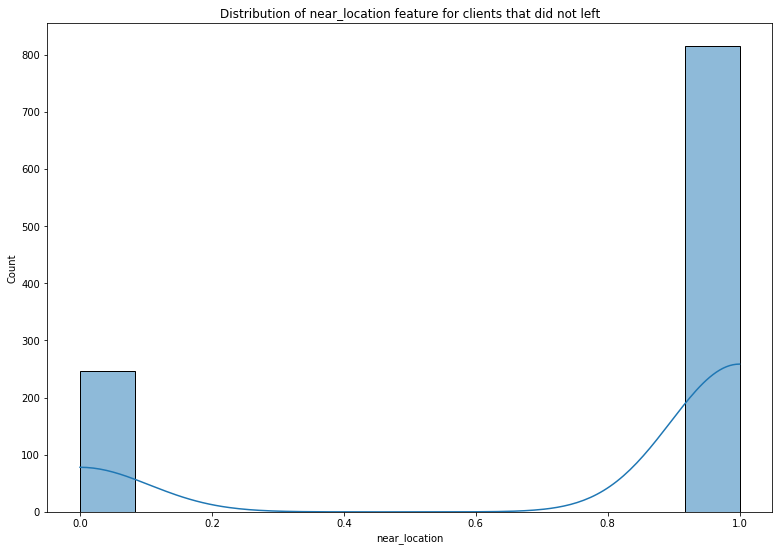

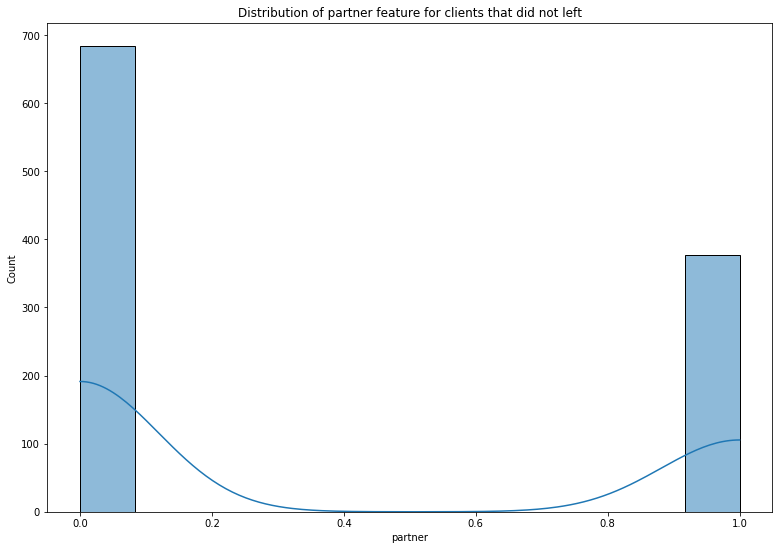

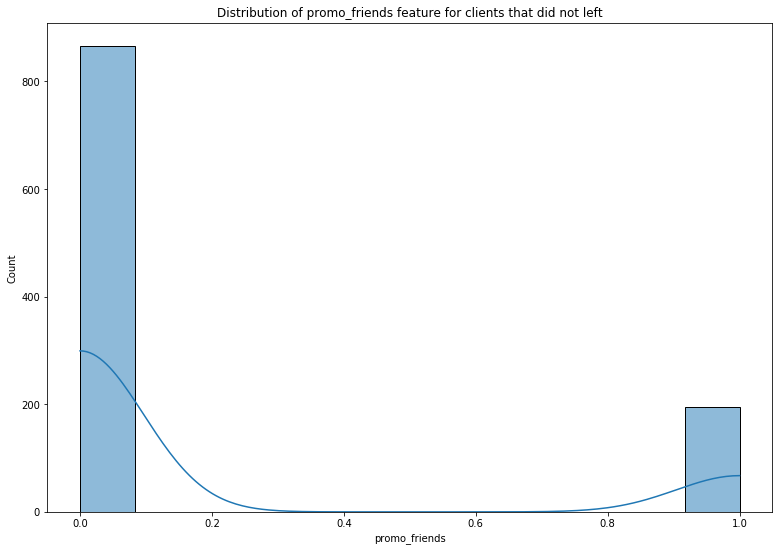

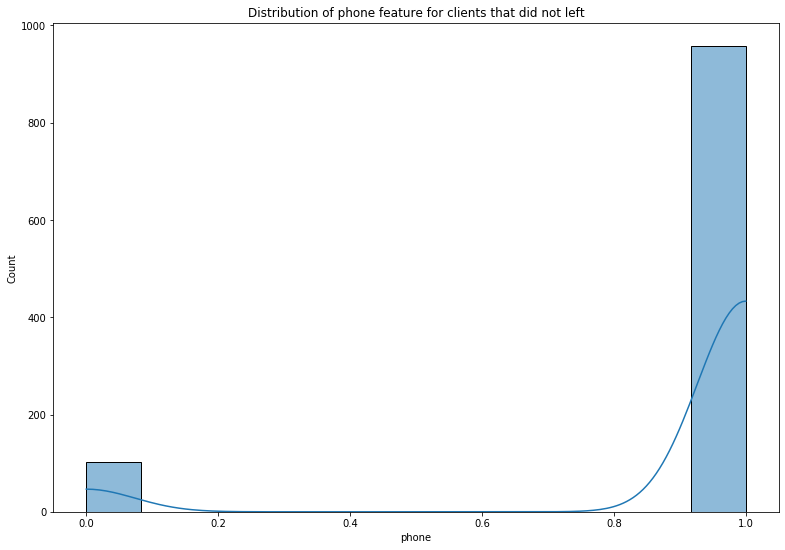

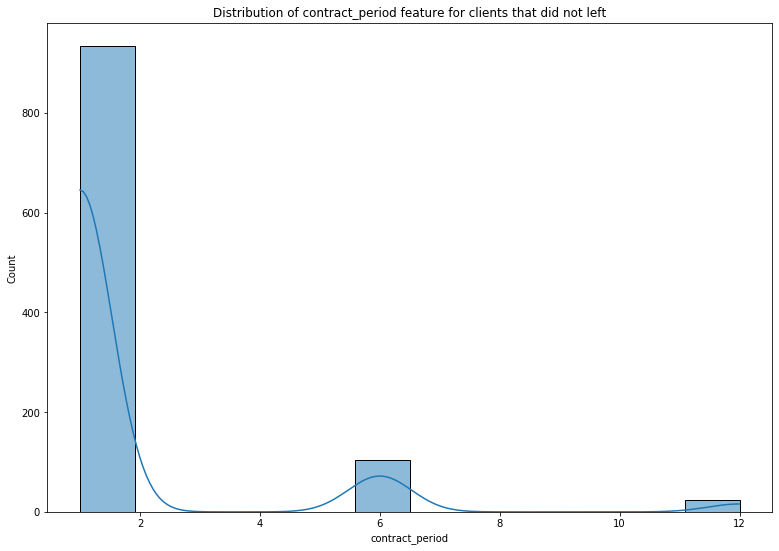

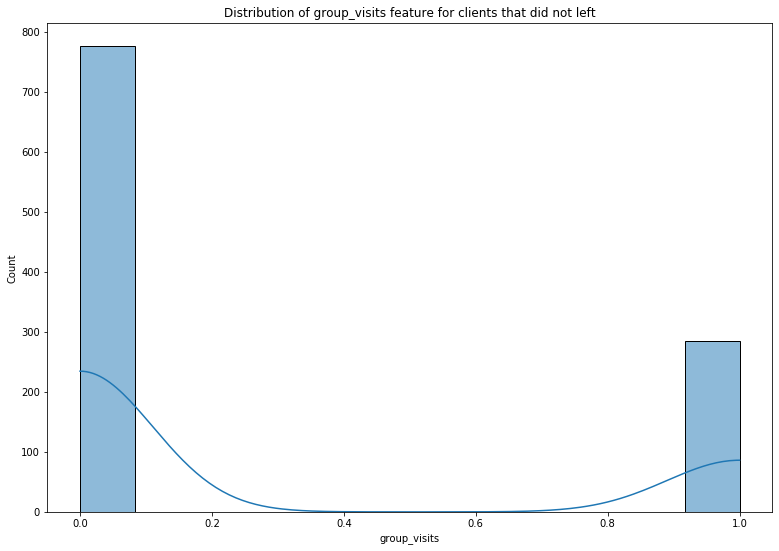

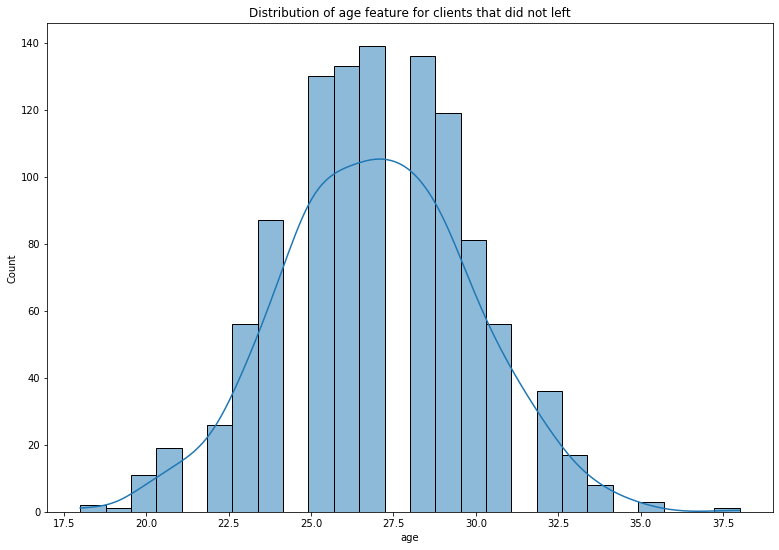

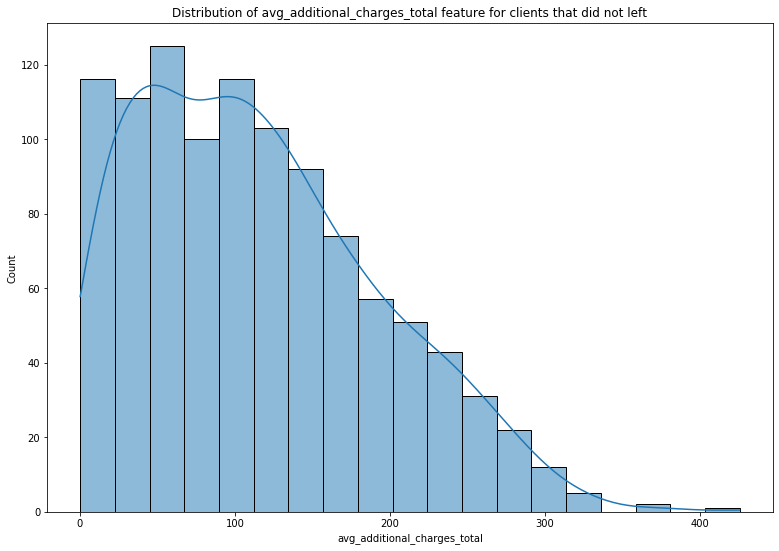

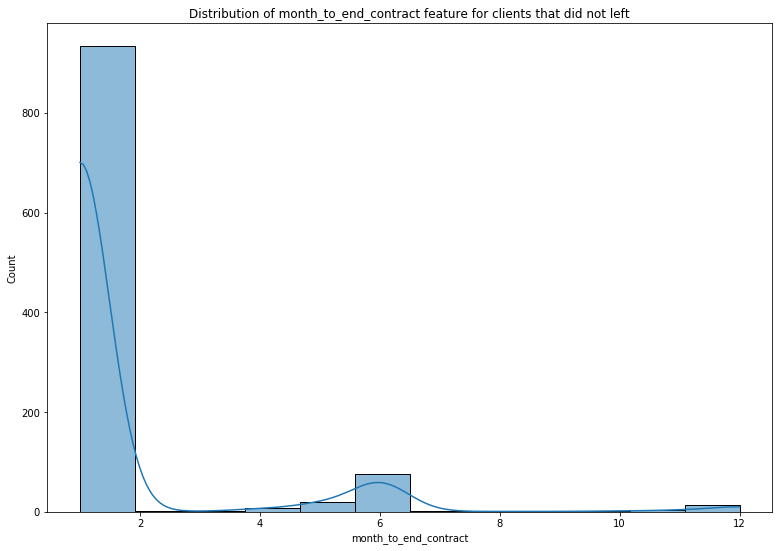

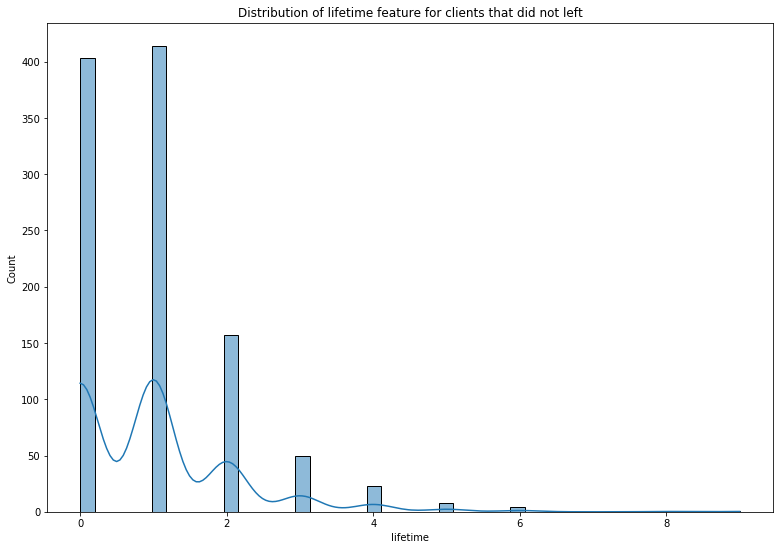

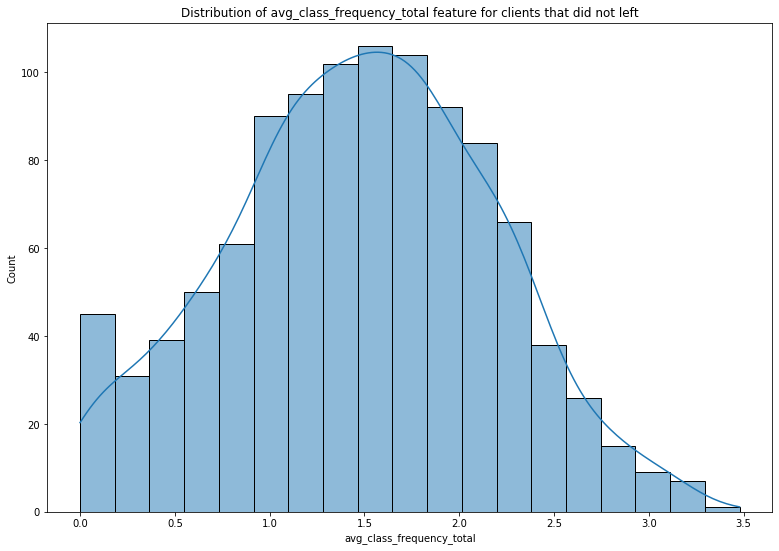

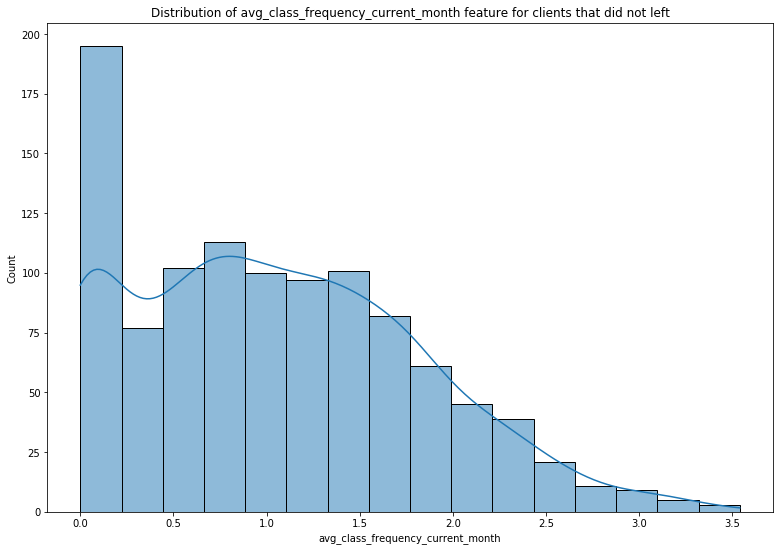

In [33]:
for i in not_churn_data.columns:
    if i == 'churn':
        continue
    else: 
        plt.figure(figsize=(13,9))
        sns.histplot(churn_data[i],kde=True)
        plt.title('Distribution of {} feature for clients that did not left'.format(i))
        plt.show()

Distribution of features in data where clients did not churn:

We can see that distributions are quite similar to distribution of data where clients did churn. So let't do more analysis.

In [34]:
cm_data = data.corr()

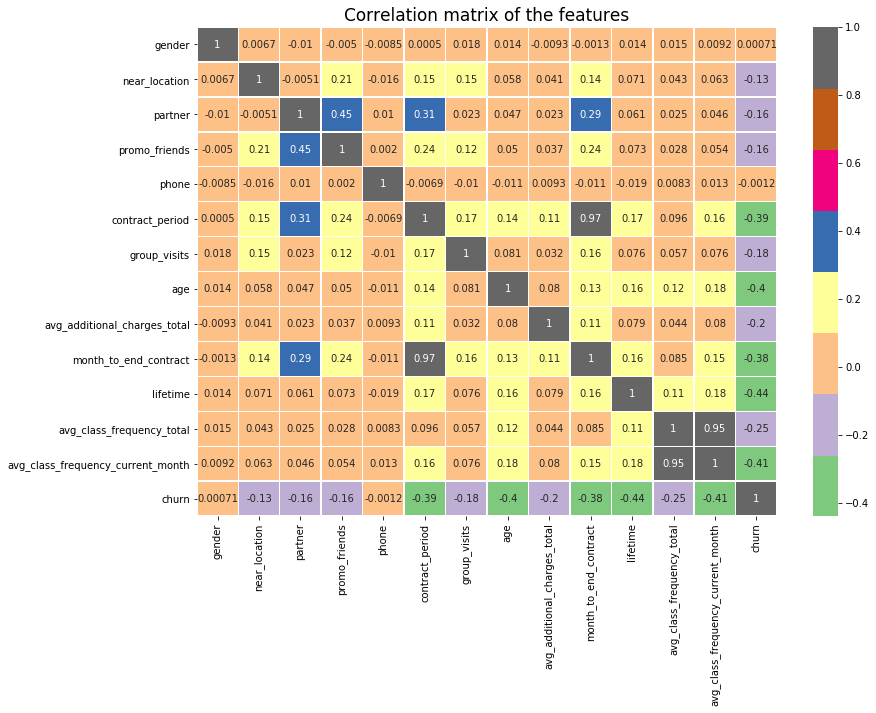

In [35]:
plt.figure(figsize=(13,9))
sns.heatmap(cm_data,linewidths=.5,annot=True,cmap="Accent")
plt.title("Correlation matrix of the features",fontdict={'size':17})

plt.show()

We can see the strongest positive correlation is between featueres contract_period and month_to_end_contract and between avg_class_frequency_current_month and avg_class_frequency_total.

churn has medium strong negative correlation with lifetime, avg_class_frequency_current_month, age, contract_period and month_to_end_contract. 

In [36]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### Build a model to predict user churn

Build a binary classification model for customers where the target feature is the user's leaving next month.
    
    Divide the data into train and validation sets using the train_test_split() function.
    
    Train the model on the train set with two methods:
        logistic regression
        random forest
        
    Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models.
    Which model gave better results?

In [37]:
#dividing the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis = 1)
y = data['churn']

#dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
#standardizing the data using the StandardScaler method
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

**LogisticRegression model:**

In [39]:
#defining the algorithm for the LogisticRegression model
logistic_model = LogisticRegression(max_iter=10000)

#training the model
logistic_model.fit(X_train, y_train)

# use the trained model to make predictions
y_predictions = logistic_model.predict(X_test)
y_probabilities = logistic_model.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
# print the studied metrics for the resulting prediction
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,y_predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


Values being closer to 1 means higer probability to get predicted values.

**RandomForestRegressor:**

In [41]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)

#train the random forest model
rf_model.fit(X_train_st, y_train)

# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [42]:
# print the studied metrics for the resulting prediction
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81


Comparing the metrics between RandomForest model and LogisticRegression model we can see that we got better values from LogisticRegression model.

### Create user clusters

**Set aside the column with data on churn and identify object (user) clusters: standardize the data.
Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.**

In [43]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [44]:
#stores the table with the linked bundles of objects
linked = linkage(X_sc,method='ward')

In [ ]:
#plt.figure(figsize=(15,10))
#dendrogram(linked,orientation='top')
#plt.title('Hierarchical clustering for GYM')
#plt.show()

We can use dendrograms to visually estimate the necessary number of clusters. The optimal number of clusters should be close to the number of different colors on the plot (4). Cosidering that lilac color has took a larger amount of branches so we should consider all together 5 clusters.

**Train the clustering model with the K-means algorithm and predict customer clusters.**

In [45]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters=5)

# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(X_sc)
labels

array([4, 2, 3, ..., 2, 2, 4], dtype=int32)

In [46]:
data['cluster_km']=labels
#storing cluster labels in the field of our dataset
data.sample(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
118,1,0,0,0,1,1,0,32,301.624707,1.0,3,1.208336,0.696494,1,0
95,1,1,0,0,1,6,0,25,101.702604,5.0,0,0.669806,0.363487,1,3
632,1,1,1,0,1,1,0,30,20.104536,1.0,1,1.745772,1.095282,1,3
1539,1,1,1,0,1,12,1,32,104.204100,12.0,8,0.280832,0.215450,0,2
3743,1,1,0,0,1,12,1,29,39.397455,11.0,11,3.293390,3.133055,0,2
1070,0,1,1,0,1,1,0,25,88.429625,1.0,4,2.088594,2.056127,0,3
214,0,1,1,0,1,1,0,25,111.953794,1.0,1,2.125158,2.272613,1,3
40,0,1,1,1,1,12,0,33,5.135184,12.0,5,2.945238,3.008918,0,2
2739,0,1,1,1,1,1,1,26,12.840916,1.0,1,1.242357,1.027849,1,3
2165,1,1,1,0,1,6,0,32,256.552299,6.0,4,1.092484,1.105217,0,3


**Look at the mean feature values for clusters. Does anything catch your eye? Which clusters are prone to leaving, and which are loyal?**

In [47]:
# get the statistics of the mean feature values per cluster
data.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.496047,0.000000,0.462451,0.079051,1.0,2.359684,0.217391,28.480237,135.685249,2.205534,2.806324,1.663497,1.481161,0.442688
1,0.555300,0.978111,0.367512,0.247696,1.0,2.601382,0.463134,30.069124,160.976221,2.402074,4.897465,2.814540,2.810663,0.073733
2,0.501984,0.959325,0.779762,0.570437,1.0,10.922619,0.545635,29.990079,160.894651,9.979167,4.744048,1.984595,1.977174,0.027778
3,0.487013,1.000000,0.345779,0.232143,1.0,1.963474,0.342532,28.155032,131.123904,1.872565,2.374188,1.229814,0.990781,0.521104
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


Analyzing the factors that impact churn most, I would say that avg_class_frequency_total and avg_class_frequency_current_month don't actually give us the clear picture, even though two highest mean values come from two clusters with the least predictable probability to leave.

lifetime values the tell us more; ranking of the values more or less corresponds to the ranking of the cluster groups. The lowest mean lifetime value is for cluster 4 (cluster with the highest churn rate). The highest mean lifetime value is for Cluster 3 and Cluster 2 (churn is 0.06 an 0.02, respectively.)

The highest mean month_to_end_contract value is for Cluster 2. People that don't tend to leave the gym usually have gym contract more than 10 months. Mean month_to_end_contract values for the rest of the clusters don't tell us much.

avg_additional_charges_total mean values tell us that clients in Cluster 2 and 3 spend more money on extras and the ones in Cluster 4 and 1 spend the least.

mean age values are a bit higher higher for Cluster 3 and 2 then for the rest of the clusters.

In cluster 1 mean value for near_location is 0, this means all clients in this cluster don´t live in the near. For cluster 0 and cluster 4 the mean value is 1, which means all clients in these clusters live near the gym. In clusters 2 and 3 the mean value for near_location is close to 1, which tells us there are just a few clients that don´t live near the gym.

In cluster 0 is the biggest share of clients who are employees of a partner company and they all used a friend's promo code when paying for their first membership.

Highest contract period is for the clients in Cluster 2; mean value more than 11 months.

**By restarting the Kernel, the values for specific clusters have changed. This is due to "random" nature of the process; clustering analysis can be done on the basis of features where we try to find subgroups of samples based on features.**

**Plot distributions of features for the clusters. Do you notice anything?**

In [48]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn', 'cluster_km'],
      dtype='object')

<Figure size 936x648 with 0 Axes>

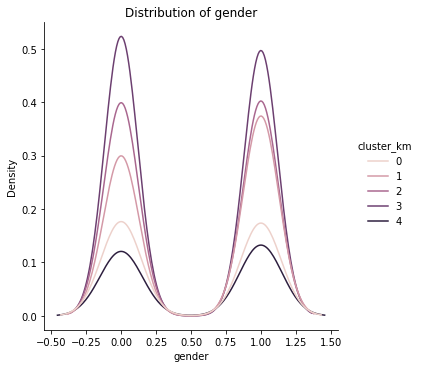

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 936x648 with 0 Axes>

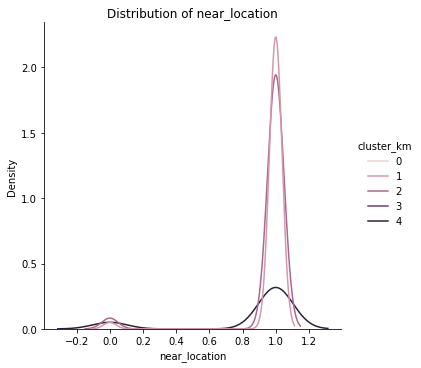

<Figure size 936x648 with 0 Axes>

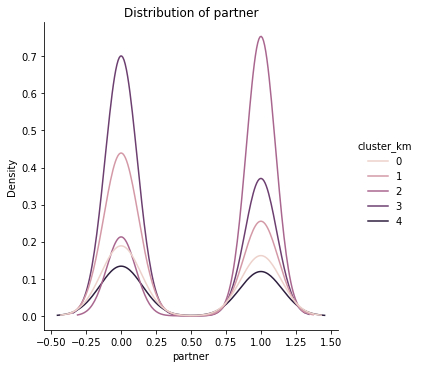

<Figure size 936x648 with 0 Axes>

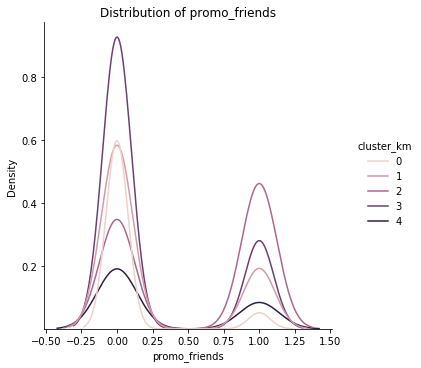

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 936x648 with 0 Axes>

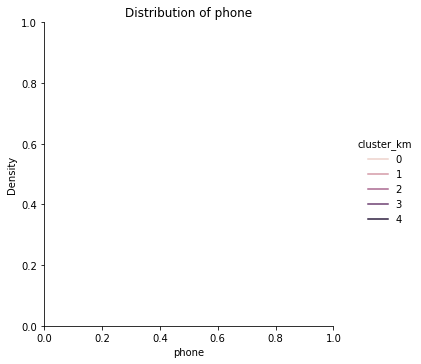

<Figure size 936x648 with 0 Axes>

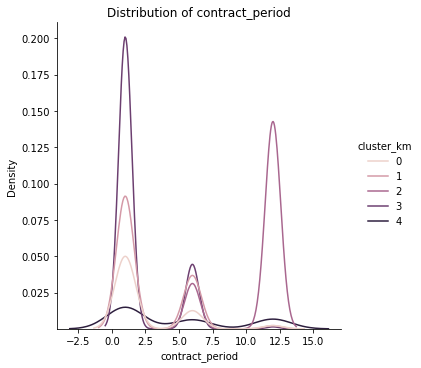

<Figure size 936x648 with 0 Axes>

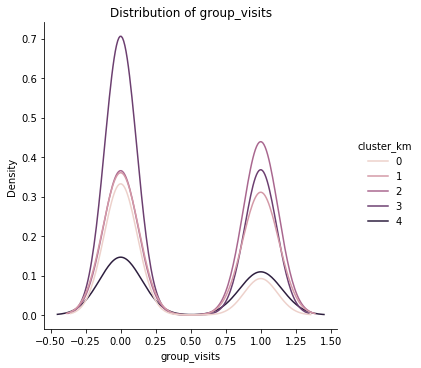

<Figure size 936x648 with 0 Axes>

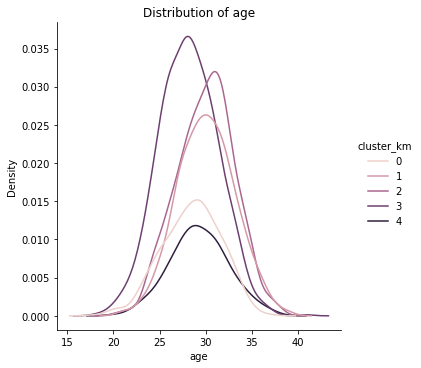

<Figure size 936x648 with 0 Axes>

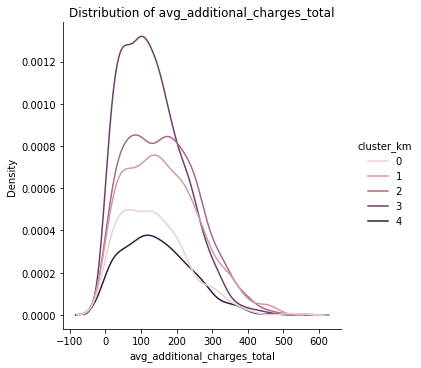

<Figure size 936x648 with 0 Axes>

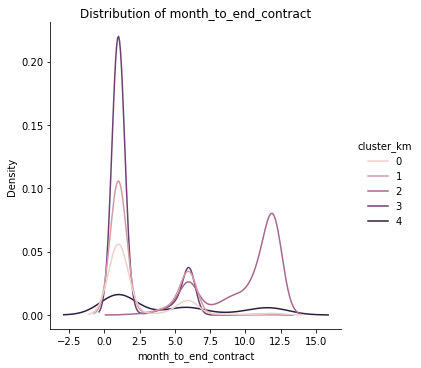

<Figure size 936x648 with 0 Axes>

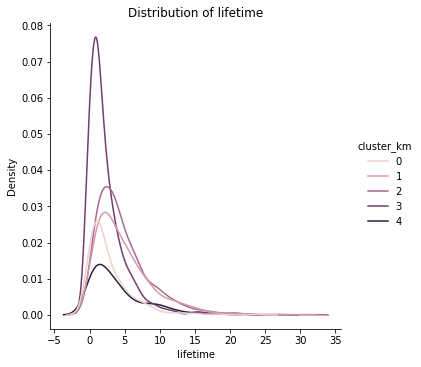

<Figure size 936x648 with 0 Axes>

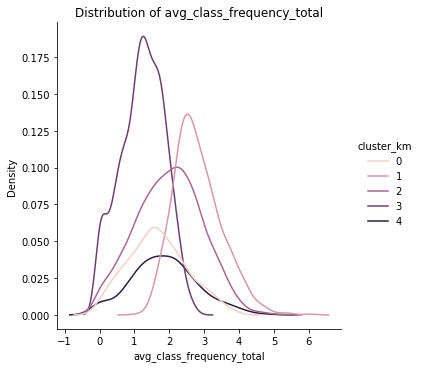

<Figure size 936x648 with 0 Axes>

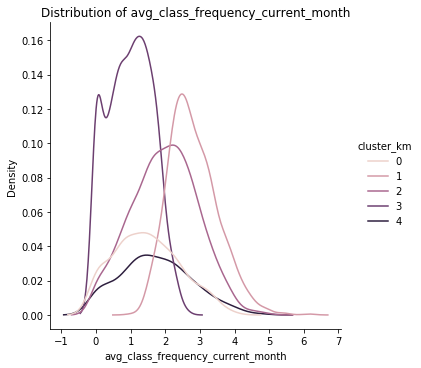

In [53]:
for i in data.columns:
    if i == 'churn':
        continue
    if i == 'cluster_km':
        continue
    else:
        plt.figure(figsize=(13,9))
        ax = sns.displot(data, x=i, hue="cluster_km",kind='kde')
        plt.title('Distribution of {}'.format(i))
        plt.show()

Now we can see the variety of feature distribution for every cluster.

**Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?**

In [51]:
data.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.442688
1    0.073733
2    0.027778
3    0.521104
4    0.266839
Name: churn, dtype: float64

By restarting the kernel I came to the conclusion that churn rates of the random 5 clusters are always very close together. We get churn rates around 0.51, 0.44, 0.25, 0.06 and 0.02. Clusters differ in terms of churn rate.

Cluster that are prone to leaving have the highest churn rate; low avg_class_frequency_total, low group_visits share, low contract_period, low promo_friends share, ...

Cluster that are loyal have the lowes churn rate; higher avg_class_frequency_total, higher lifetime value, higher avg_additional_charges_total, ...

### Come up with conclusions and basic recommendations on working with customers

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.

We can see in cluster with the bigest churn rate that these clients mostly live near the gym, mean age value is the lowest in this group, they have the least additional charges. They don't come to the gym so often, and the came by their own initiative; they are not an emplyees of a aprtner company nor did they came through promo ticket. They don't spend too much time in the the group activities as well. I would call this groupy **'Lazy'** because it seems they don't have a lot of motivation for working out even though they live near the gym, but they did make an effort to join the gym, without a hel of a friend or a company where they work. It would be wise to make a kind of an interview or ask them to to fill up a questionare where they could possibly express their needs.

The second cluster by the churn rate is the group that differentiate from 'Lazy' group is that they don't live near the gym, but they still spend more time in the gym than the lazy ones, they did not use the promo ticket but big part of them came as an employees of a partner company. Even though they have a membership discount they still have low additional costs. I would call this group **'Curious'** because they come to the gym even the don't live near. It could be useful to offer some kind of promo, for example; if they bring 5 new friends to the gym, they get one month free of charge. Also, a questionare or some kind of interview would also help with these group of clients.

The third cluster by the churn rate are clients that live near, big share of them are employees of partner company, they came throught promo ticket and the spend more time in gym than users from previous clusters. They also have higher additional costs. churn rate for this cluster is around 0.25 so the don't leave as much. They feel comfortable living near and have discount as employees of a partner company. I would call this group **Comfortable**

Fourth cluster by the churn rate are clients that live near and a low share of them came through partner company or by promo ticket. Their average additional costs are second highest, they spend the most time in the gym and they are the longest lasting members. Still, they don't make long period contracts with the gym. They are real gym **Enthusiasts**. It would be wise to show graditude to these clients and make a special gift or discount card.

Fifth cluster by the churn rate are clients that have the longest contract periods, on average around 11 months period. They have the highest additional costs, more than half of them enjoy group trainings. They live near and they are employees of a partner company. Around half of them came through promo ticket. Even though they have discount on membership and the spend the most money, they spend less time in gym than Enthusiasts. I will call them **Committed** because the plan to stay, considerig their long contract periods.